# US Accidents Dataset - Initial Loading and Exploration

**Objective**: Load the US Accidents dataset and perform initial exploration to understand the data structure, quality, and key characteristics.

**Dataset**: US Accidents (2016-2023)
- Source: Kaggle (sobhanmoosavi/us-accidents)
- Size: 2.9 GB, 7.7M+ records, 46 columns
- Geographic Coverage: 49 US states

## Notebook Contents
1. Environment Setup
2. Data Loading
3. Basic Statistics
4. Data Quality Assessment
5. Geographic Coverage
6. Temporal Patterns
7. Severity Distribution
8. Initial Findings

## 1. Environment Setup

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from pathlib import Path
import sys
import psutil

print("✓ Required packages imported")

✓ Required packages imported


In [11]:
# Add project root to path
project_root = Path().absolute().parent
sys.path.insert(0, str(project_root))

from src.config import Config
from src.utils.logging import setup_logger

# Setup
logger = setup_logger(__name__)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Environment setup complete")
print(f"Project root: {project_root}")

✓ Environment setup complete
Project root: /home/pfanyka/Desktop/MASTERS/FCDados/DScience_project


## 2. Data Loading

Let's load the dataset. For initial exploration, we'll load a sample to understand structure before loading the full dataset.

In [12]:
# Dataset path
data_path = Config.ACCIDENTS_RAW_DIR / "US_Accidents_March23.csv"
print(f"Loading data from: {data_path}")
print(f"File size: {data_path.stat().st_size / 1024**3:.2f} GB")

Loading data from: /home/pfanyka/Desktop/MASTERS/FCDados/DScience_project/data/raw/accidents_raw/US_Accidents_March23.csv
File size: 2.85 GB


In [13]:
# Load a sample first to understand structure (faster)
print("Loading sample of 1000 records to explore structure...")
df_sample = pd.read_csv(data_path, sep=',', nrows=1000)

print(f"\n✓ Sample loaded: {len(df_sample):,} rows × {len(df_sample.columns)} columns")
print(f"Memory usage: {df_sample.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading sample of 1000 records to explore structure...

✓ Sample loaded: 1,000 rows × 46 columns
Memory usage: 1.25 MB


### Quick Preview

In [14]:
# Display first few records
df_sample.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.87,-84.06,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90,NaN,91.00,29.68,10.00,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.93,-82.83,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.90,NaN,100.00,29.65,10.00,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.06,-84.03,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.00,33.30,100.00,29.67,10.00,SW,3.50,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.75,-84.21,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.10,31.00,96.00,29.64,9.00,SW,4.60,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.63,-84.19,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.00,33.30,89.00,29.65,6.00,SW,3.50,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [15]:
# Column names and types
print("Dataset Columns:")
print("=" * 70)
for i, (col, dtype) in enumerate(df_sample.dtypes.items(), 1):
    print(f"{i:2d}. {col:30s} {str(dtype):15s}")

Dataset Columns:
 1. ID                             object         
 2. Source                         object         
 3. Severity                       int64          
 4. Start_Time                     object         
 5. End_Time                       object         
 6. Start_Lat                      float64        
 7. Start_Lng                      float64        
 8. End_Lat                        float64        
 9. End_Lng                        float64        
10. Distance(mi)                   float64        
11. Description                    object         
12. Street                         object         
13. City                           object         
14. County                         object         
15. State                          object         
16. Zipcode                        object         
17. Country                        object         
18. Timezone                       object         
19. Airport_Code                   object         
20. Weather_Ti

## 3. Data Type Optimization

Before loading the full dataset, let's optimize data types to reduce memory usage.

In [16]:
# Define optimized data types
dtype_dict = {
    'ID': 'str',
    'Source': 'category',
    'Severity': 'int8',
    'Start_Lat': 'float32',
    'Start_Lng': 'float32',
    'End_Lat': 'float32',
    'End_Lng': 'float32',
    'Distance(mi)': 'float32',
    'Side': 'category',
    'City': 'category',
    'County': 'category',
    'State': 'category',
    'Zipcode': 'str',
    'Country': 'category',
    'Timezone': 'category',
    'Airport_Code': 'category',
    'Weather_Timestamp': 'str',  # Will convert to datetime
    'Temperature(F)': 'float32',
    'Wind_Chill(F)': 'float32',
    'Humidity(%)': 'float32',
    'Pressure(in)': 'float32',
    'Visibility(mi)': 'float32',
    'Wind_Direction': 'category',
    'Wind_Speed(mph)': 'float32',
    'Precipitation(in)': 'float32',
    'Weather_Condition': 'category',
    'Amenity': 'bool',
    'Bump': 'bool',
    'Crossing': 'bool',
    'Give_Way': 'bool',
    'Junction': 'bool',
    'No_Exit': 'bool',
    'Railway': 'bool',
    'Roundabout': 'bool',
    'Station': 'bool',
    'Stop': 'bool',
    'Traffic_Calming': 'bool',
    'Traffic_Signal': 'bool',
    'Turning_Loop': 'bool',
    'Sunrise_Sunset': 'category',
    'Civil_Twilight': 'category',
    'Nautical_Twilight': 'category',
    'Astronomical_Twilight': 'category'
}

# Parse dates
parse_dates = ['Start_Time', 'End_Time']

print("Data type optimization configured")
print(f"Categorical columns: {sum(1 for v in dtype_dict.values() if v == 'category')}")
print(f"Boolean columns: {sum(1 for v in dtype_dict.values() if v == 'bool')}")
print(f"Float32 columns: {sum(1 for v in dtype_dict.values() if v == 'float32')}")

Data type optimization configured
Categorical columns: 14
Boolean columns: 13
Float32 columns: 12


## 4. Load Full Dataset

Now let's load the complete dataset with optimized types. **Note**: This may take 1-2 minutes.

In [17]:
# Toggle: control how much data to load (in-notebook)

# Safe defaults for EDA (adjust as needed)
FORCE_FULL_LOAD = 1        # 0 = sample by chunks (safe); 1 = full load (heavy)
EDA_SAMPLE_ROWS = 150000   # total rows to target in the sampled DataFrame
ROW_CHUNK_SIZE = 70000     # rows per chunk to read from CSV

print("Loader toggles:")
print("  FORCE_FULL_LOAD:", FORCE_FULL_LOAD)
print("  EDA_SAMPLE_ROWS:", EDA_SAMPLE_ROWS)
print("  ROW_CHUNK_SIZE:" , ROW_CHUNK_SIZE)

Loader toggles:
  FORCE_FULL_LOAD: 1
  EDA_SAMPLE_ROWS: 150000
  ROW_CHUNK_SIZE: 70000


In [18]:
%%time
# Memory-safe dataset loading: sample using chunks if full load might crash
import gc

# Clear any existing df from memory before loading
if 'df' in locals():
    print("Clearing previous DataFrame from memory in case of rerun!\n")
    del df
    gc.collect()

print("Loading dataset with a memory-safe strategy...")

# Default to 0 (safe) unless explicitly overridden
force_full = FORCE_FULL_LOAD == 1
is_sampled = False  # Track whether we sampled or not

if force_full:
    try:
        mem = psutil.virtual_memory()
        print(f"Available memory: {mem.available / 1024**3:.2f} GB")
        print("Note the current .csv file has a memory size of ~3 GB")
        if mem.available < 3 * 1024**3:
            print("⚠️  Insufficient memory for full dataset load (may use ~3 GB RAM).")
            print("    Falling back to sampled mode to avoid crash.")
            force_full = False
        else:
            print("✓ Sufficient memory detected for full dataset load.")
            print(f"\nAttempting full load (might take a few minutes)!")
            print(f"Loading 7.7M+ rows of full dataset in chunks size of {ROW_CHUNK_SIZE:,}\n")
    except ImportError:
        print("⚠️  psutil package not installed, skipping memory check.")
        print("    Falling back to sampled mode to avoid memory issues.")
        force_full = False

if force_full:
    # Full load path
    parts = []
    rows = 0
    for chunk in pd.read_csv(
        data_path,
        dtype=dtype_dict,
        parse_dates=parse_dates,
        low_memory=True,
        chunksize=ROW_CHUNK_SIZE
    ):
        parts.append(chunk)
        rows += len(chunk)
        if rows >= 8000000:
            break
    df = pd.concat(parts, ignore_index=True)
    del parts  # Free chunk list immediately
    gc.collect()
    is_sampled = False
else:
    # Sampled load path
    print(f"Building a sampled DataFrame (first {EDA_SAMPLE_ROWS:,} rows) using chunks of {ROW_CHUNK_SIZE:,}...")
    
    parts = []
    rows = 0
    for chunk in pd.read_csv(
        data_path,
        dtype=dtype_dict,
        parse_dates=parse_dates,
        low_memory=True,
        chunksize=ROW_CHUNK_SIZE
    ):
        parts.append(chunk)
        rows += len(chunk)
        if rows >= EDA_SAMPLE_ROWS:
            break
    df = pd.concat(parts, ignore_index=True)
    del parts  # Free chunk list immediately
    gc.collect()
    is_sampled = True

print(f"\n✓ DataFrame ready! Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**3:.2f} GB")

# Report current memory status
mem_after = psutil.virtual_memory()
print(f"Available memory after load: {mem_after.available / 1024**3:.2f} GB")

if is_sampled:
    print('\nNote: Using a sampled subset to keep memory usage safe. Set FORCE_FULL_LOAD=1 to load all rows.')

# Display first few records of the loaded DataFrame
df.head()

Loading dataset with a memory-safe strategy...
Available memory: 6.92 GB
Note the current .csv file has a memory size of ~3 GB
✓ Sufficient memory detected for full dataset load.

Attempting full load (might take a few minutes)!
Loading 7.7M+ rows of full dataset in chunks size of 70,000


✓ DataFrame ready! Shape: 7,728,394 rows × 46 columns
Memory usage: 7.73 GB
Available memory after load: 2.65 GB
CPU times: user 1min 6s, sys: 5.61 s, total: 1min 12s
Wall time: 1min 14s


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.87,-84.06,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90,NaN,91.00,29.68,10.00,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.93,-82.83,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.90,NaN,100.00,29.65,10.00,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.06,-84.03,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.00,33.30,100.00,29.67,10.00,SW,3.50,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.75,-84.21,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.10,31.00,96.00,29.64,9.00,SW,4.60,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.63,-84.19,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.00,33.30,89.00,29.65,6.00,SW,3.50,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


## 5. Basic Statistics

In [19]:
# Dataset info
print("Dataset Information:")
print("=" * 70)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     object  
 1   Source                 object  
 2   Severity               int8    
 3   Start_Time             object  
 4   End_Time               object  
 5   Start_Lat              float32 
 6   Start_Lng              float32 
 7   End_Lat                float32 
 8   End_Lng                float32 
 9   Distance(mi)           float32 
 10  Description            object  
 11  Street                 object  
 12  City                   object  
 13  County                 object  
 14  State                  object  
 15  Zipcode                object  
 16  Country                category
 17  Timezone               object  
 18  Airport_Code           object  
 19  Weather_Timestamp      object  
 20  Temperature(F)         float32 
 21  Wind_Chill

In [20]:
# Summary statistics for numeric columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7728394.00,7728394.00,7728394.00,4325632.00,4325632.00,7728394.00,7564541.00,5729375.00,7554250.00,7587715.00,7551296.00,7157161.00,5524808.00
mean,2.21,36.20,-94.70,36.26,-95.73,0.56,61.66,58.25,64.83,29.54,9.09,7.69,0.01
std,0.49,5.08,17.39,5.27,18.11,1.78,19.01,22.39,22.82,1.01,2.69,5.42,0.11
min,1.00,24.55,-124.62,24.57,-124.55,0.00,-89.00,-89.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,33.40,-117.22,33.46,-117.75,0.00,49.00,43.00,48.00,29.37,10.00,4.60,0.00
50%,2.00,35.82,-87.77,36.18,-88.03,0.03,64.00,62.00,67.00,29.86,10.00,7.00,0.00
75%,2.00,40.08,-80.35,40.18,-80.25,0.46,76.00,75.00,84.00,30.03,10.00,10.40,0.00
max,4.00,49.00,-67.11,49.08,-67.11,441.75,207.00,207.00,100.00,58.63,140.00,1087.00,36.47


## 6. Data Quality Assessment

In [21]:
# Missing values analysis
missing = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(f"Columns with missing values: {len(missing)} out of {len(df.columns)}")
print("\nColumns with missing data:")
display(missing)

Columns with missing values: 22 out of 46

Columns with missing data:


,Column,Missing_Count,Missing_Percentage
7,End_Lat,3402762,44.03
8,End_Lng,3402762,44.03
27,Precipitation(in),2203586,28.51
21,Wind_Chill(F),1999019,25.87
26,Wind_Speed(mph),571233,7.39
24,Visibility(mi),177098,2.29
25,Wind_Direction,175206,2.27
22,Humidity(%),174144,2.25
28,Weather_Condition,173459,2.24
20,Temperature(F),163853,2.12


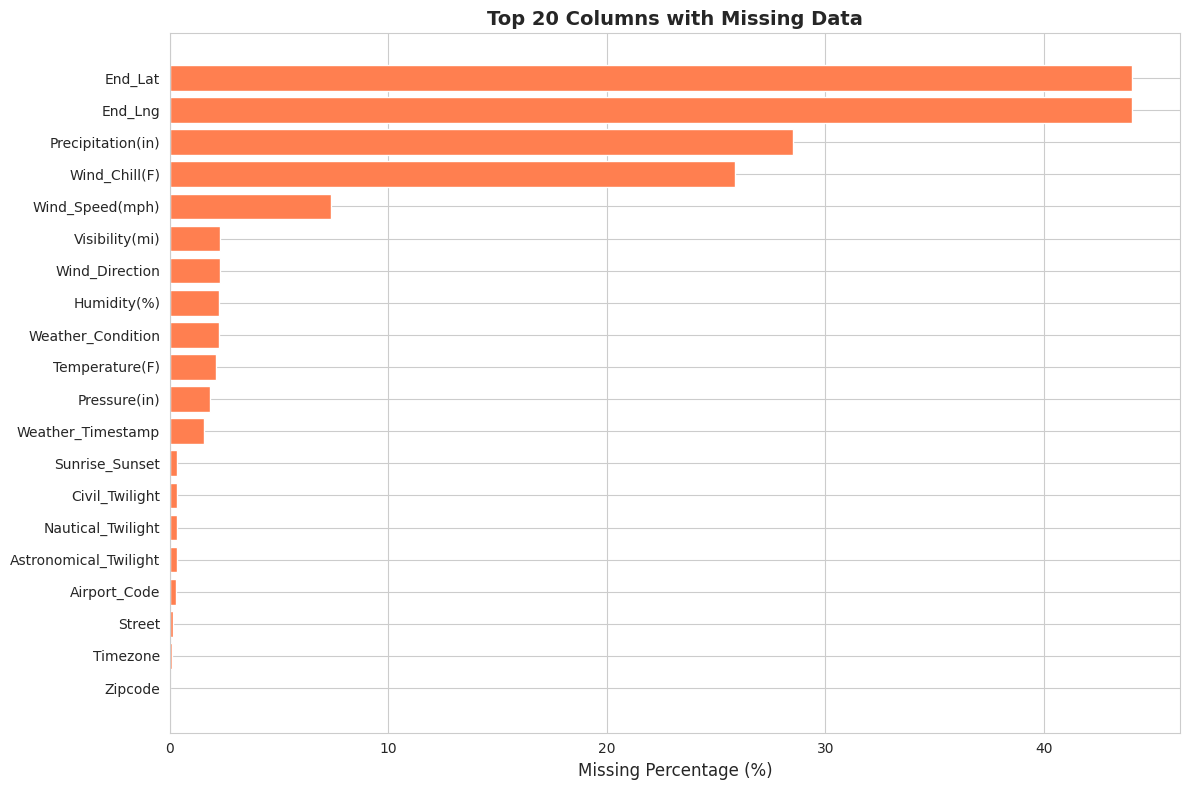

In [22]:
# Visualize missing data
fig, ax = plt.subplots(figsize=(12, 8))
missing_top = missing.head(20)
ax.barh(missing_top['Column'], missing_top['Missing_Percentage'], color='coral')
ax.set_xlabel('Missing Percentage (%)', fontsize=12)
ax.set_title('Top 20 Columns with Missing Data', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## 7. Geographic Coverage

In [23]:
# State distribution
state_counts = df['State'].value_counts().head(15)
print("Top 15 States by Accident Count:")
print("=" * 40)
for state, count in state_counts.items():
    pct = (count / len(df)) * 100
    print(f"{state:10s} {count:>10,}  ({pct:5.2f}%)")

Top 15 States by Accident Count:
CA          1,741,433  (22.53%)
FL            880,192  (11.39%)
TX            582,837  ( 7.54%)
SC            382,557  ( 4.95%)
NY            347,960  ( 4.50%)
NC            338,199  ( 4.38%)
VA            303,301  ( 3.92%)
PA            296,620  ( 3.84%)
MN            192,084  ( 2.49%)
OR            179,660  ( 2.32%)
AZ            170,609  ( 2.21%)
GA            169,234  ( 2.19%)
IL            168,958  ( 2.19%)
TN            167,388  ( 2.17%)
MI            162,191  ( 2.10%)


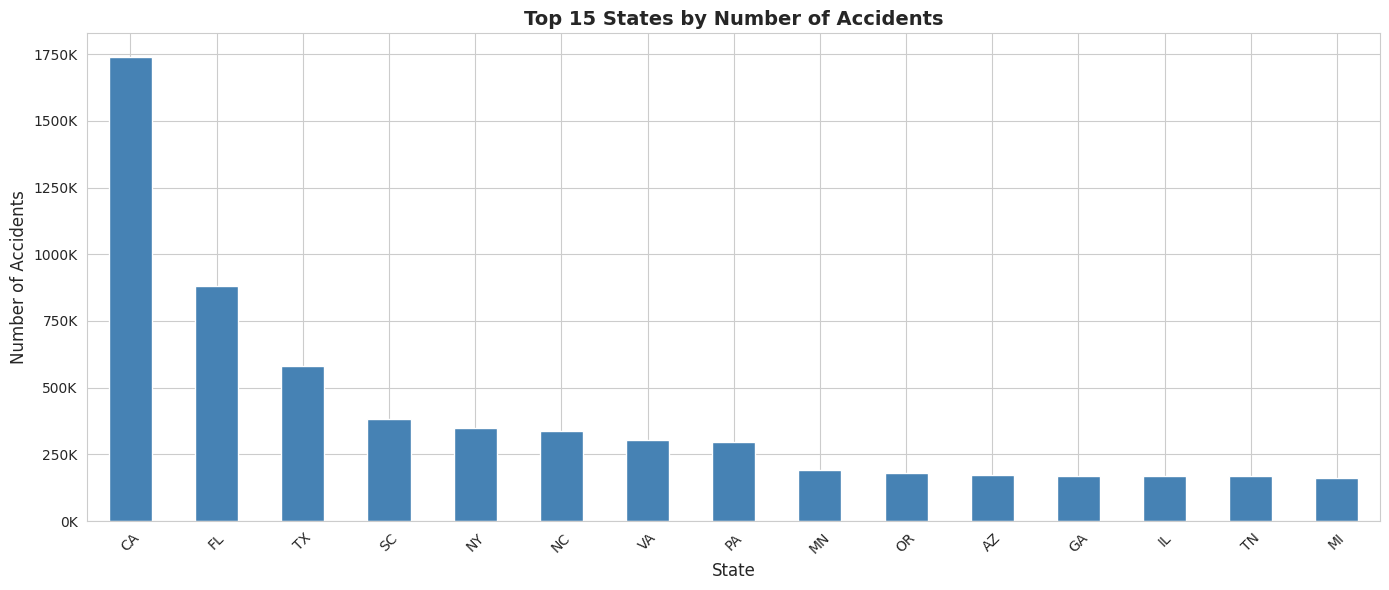

In [24]:
# Visualize state distribution
fig, ax = plt.subplots(figsize=(14, 6))
state_counts.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Top 15 States by Number of Accidents', fontsize=14, fontweight='bold')
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Accidents', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Geographic bounds
print("\nGeographic Coordinate Ranges:")
print("=" * 50)
print(f"Latitude:  {df['Start_Lat'].min():.4f}° to {df['Start_Lat'].max():.4f}°")
print(f"Longitude: {df['Start_Lng'].min():.4f}° to {df['Start_Lng'].max():.4f}°")
print("\nUnique locations:")
print(f"  States:  {df['State'].nunique()}")
print(f"  Cities:  {df['City'].nunique():,}")
print(f"  Counties: {df['County'].nunique():,}")


Geographic Coordinate Ranges:
Latitude:  24.5548° to 49.0022°
Longitude: -124.6238° to -67.1132°

Unique locations:
  States:  49
  Cities:  13,678
  Counties: 1,871


## 8. Temporal Patterns

In [26]:
# Convert date columns to datetime if not already
df[['Start_Time', 'End_Time', 'Weather_Timestamp']] = df[['Start_Time', 'End_Time', 'Weather_Timestamp']].apply(pd.to_datetime)

# Temporal coverage
print("Temporal Coverage:")
print("=" * 50)
time_span = (df['Start_Time'].max() - df['Start_Time'].min()).days / 365
print(f"First accident: {df['Start_Time'].min()}")
print(f"Last accident:  {df['Start_Time'].max()}")
print(f"Time span:      {time_span:.2f} years")

Temporal Coverage:
First accident: 2016-01-14 20:18:33
Last accident:  2023-03-31 23:30:00
Time span:      7.21 years


In [27]:
# Extract temporal features for analysis
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
df['DayName'] = df['Start_Time'].dt.day_name()

print("✓ Temporal features extracted")

✓ Temporal features extracted


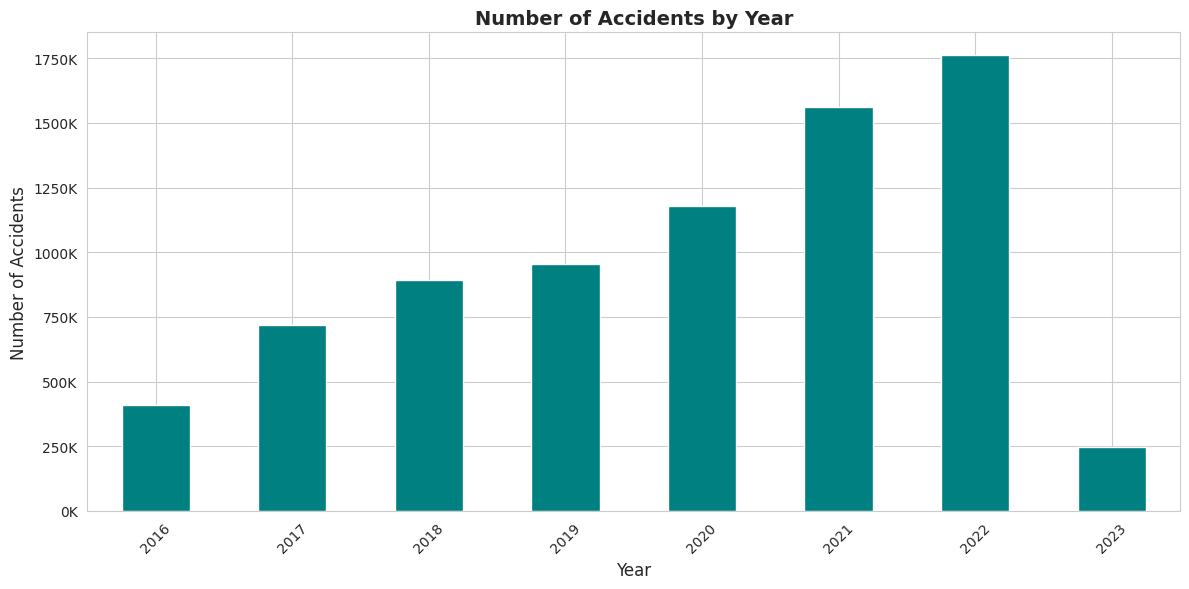


Accidents per year:
2016:    410,821
2017:    718,093
2018:    893,426
2019:    954,303
2020:  1,178,913
2021:  1,563,753
2022:  1,762,452
2023:    246,633


In [28]:
# Accidents by year
year_counts = df['Year'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
year_counts.plot(kind='bar', ax=ax, color='teal')
ax.set_title('Number of Accidents by Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Accidents', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nAccidents per year:")
for year, count in year_counts.items():
    print(f"{year}: {count:>10,}")

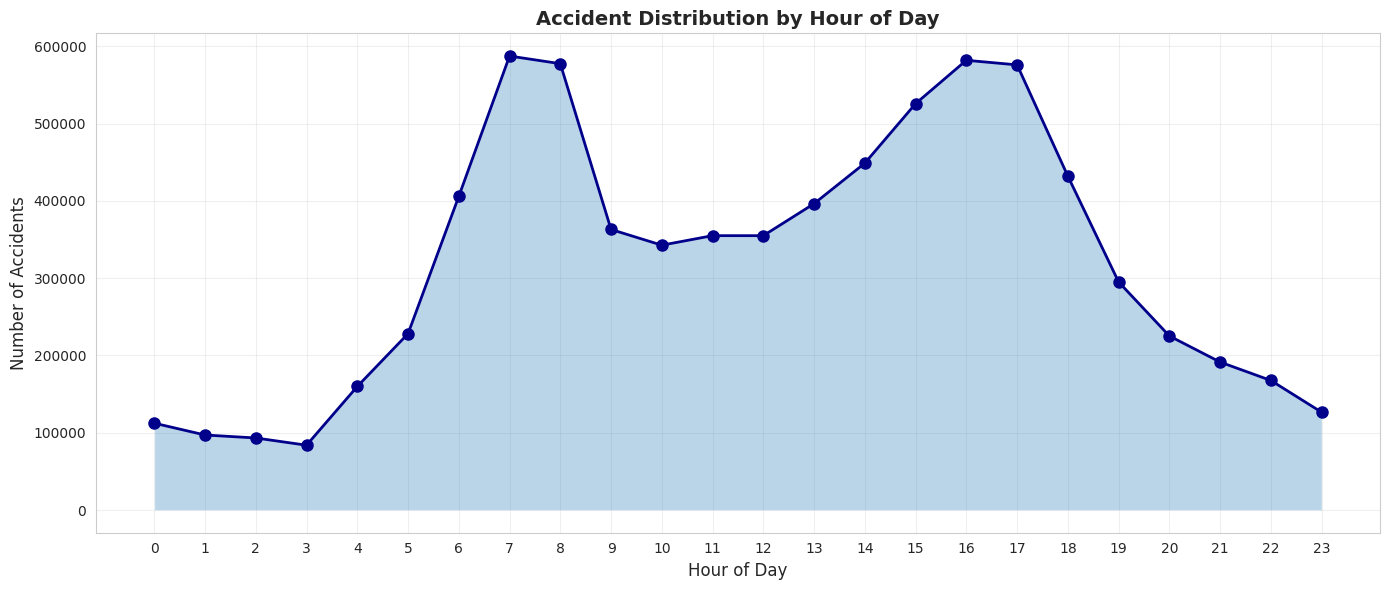

In [29]:
# Accidents by hour of day
hour_counts = df['Hour'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2, markersize=8, color='darkblue')
ax.fill_between(hour_counts.index, hour_counts.values, alpha=0.3)
ax.set_title('Accident Distribution by Hour of Day', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Number of Accidents', fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_xticks(range(0, 24))
plt.tight_layout()
plt.show()

**Common sense:** A lot of accidents happen during rush hours (Time of day) that most people commute to/from work. Lets see if the data confirms this.

In [30]:
# Identify the peak hours for accidents
peak_hours = hour_counts.sort_values(ascending=False).head(10)
min_accidents = hour_counts.min()
print("\nTop 10 Peak Hours for Accidents:\n")
for hour, count in peak_hours.items():
    print(f"At {hour:02d}h: {count:,} accidents ({count/min_accidents:.2f}x minimum)")  

print(f"\nMinimum Accidents in a Single Hour (all week): {min_accidents:,} accidents")


Top 10 Peak Hours for Accidents:

At 07h: 587,472 accidents (7.01x minimum)
At 16h: 581,969 accidents (6.94x minimum)
At 08h: 577,576 accidents (6.89x minimum)
At 17h: 576,015 accidents (6.87x minimum)
At 15h: 525,855 accidents (6.27x minimum)
At 14h: 448,846 accidents (5.35x minimum)
At 18h: 432,042 accidents (5.15x minimum)
At 06h: 405,837 accidents (4.84x minimum)
At 13h: 396,445 accidents (4.73x minimum)
At 09h: 363,034 accidents (4.33x minimum)

Minimum Accidents in a Single Hour (all week): 83,863 accidents


## Rush Hour Analysis

The data confirms our hypothesis about rush hour patterns. Looking at the top 10 peak hours for accidents:

**Morning Rush Hours (7-8 AM):**
- Hour 07: 587,472 accidents (7.01x minimum)
- Hour 08: 577,576 accidents (6.89x minimum)

**Evening Rush Hours (3-4 PM):**
- Hour 16: 581,969 accidents (6.94x minimum)
- Hour 17: 576,015 accidents (6.87x minimum)
- Hour 15: 525,855 accidents (6.27x minimum)


**Key Observations:**
- The highest accident count occurs at **7 AM** (587,472), marking the peak of morning commute
- Evening rush hour spans a longer period (3-4 PM) with consistently high accident rates
- These peak hours show **4.3x to 7.0x** higher accident rates compared to the minimum (83,863 at 3 AM)
- The data confirms that commute times are the most dangerous periods for driving

This pattern aligns with typical work schedules where people commute between 7-8 AM and 3-5 PM, resulting in increased traffic density and higher accident risk during these periods.

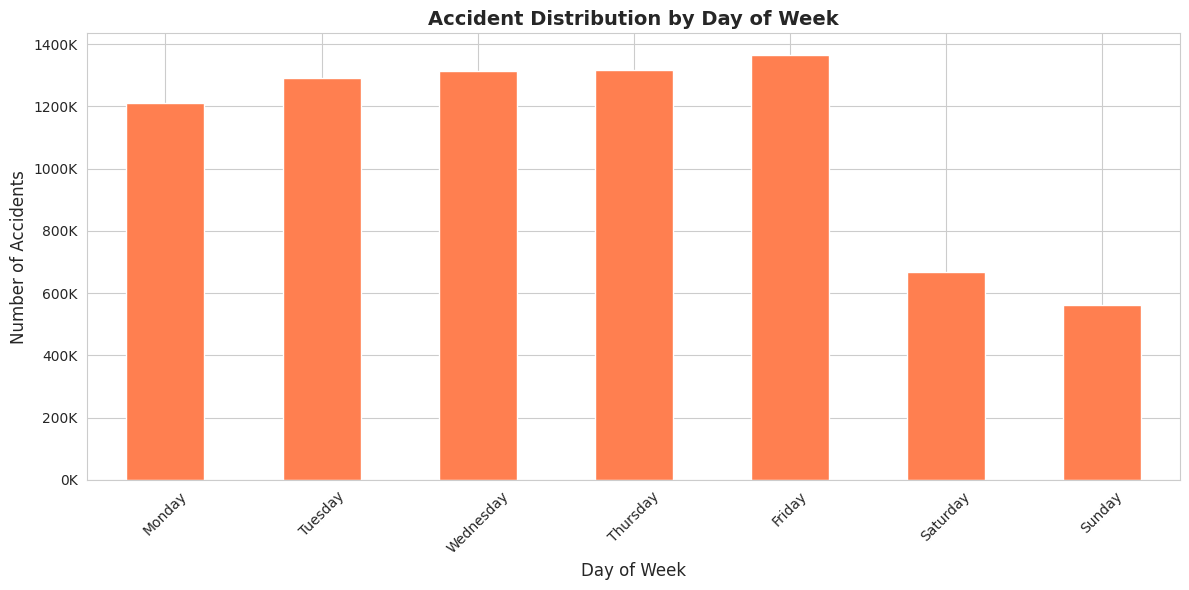

In [31]:
# Accidents by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DayName'].value_counts().reindex(day_order)

fig, ax = plt.subplots(figsize=(12, 6))
day_counts.plot(kind='bar', ax=ax, color='coral')
ax.set_title('Accident Distribution by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Number of Accidents', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** The weekeend has a much lower number of accidents when compared to weekdays. This is likely due to lower traffic volumes as fewer people commute to work.

Lets visualize if there are still the same rush hour patterns during weekends.

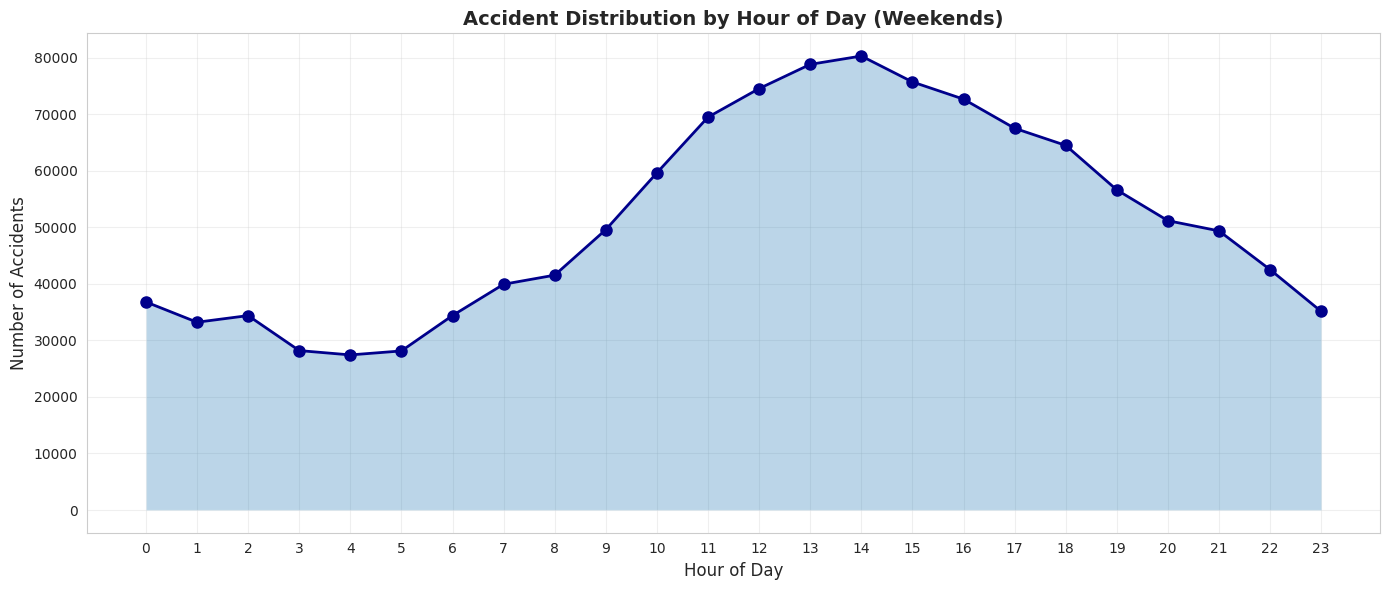


Top 10 Peak Hours for Accidents:

At 14h: 80,285 accidents (2.93x minimum)
At 13h: 78,811 accidents (2.87x minimum)
At 15h: 75,704 accidents (2.76x minimum)
At 12h: 74,529 accidents (2.72x minimum)
At 16h: 72,662 accidents (2.65x minimum)
At 11h: 69,479 accidents (2.53x minimum)
At 17h: 67,508 accidents (2.46x minimum)
At 18h: 64,482 accidents (2.35x minimum)
At 10h: 59,633 accidents (2.17x minimum)
At 19h: 56,609 accidents (2.06x minimum)

Minimum Accidents in a Single Hour (weekends): 27,429 accidents


In [32]:
# Accidents by hour of day on weekends

hour_counts = df[df['DayOfWeek'].isin([5, 6])]['Hour'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2, markersize=8, color='darkblue')
ax.fill_between(hour_counts.index, hour_counts.values, alpha=0.3)
ax.set_title('Accident Distribution by Hour of Day (Weekends)', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Number of Accidents', fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Identify the peak hours for accidents

min_accidents = hour_counts.min()
peak_hours = hour_counts.sort_values(ascending=False).head(10)

print("\nTop 10 Peak Hours for Accidents:\n")
for hour, count in peak_hours.items():
    print(f"At {hour:02d}h: {count:,} accidents ({count/min_accidents:.2f}x minimum)")  

print(f"\nMinimum Accidents in a Single Hour (weekends): {min_accidents:,} accidents")

**Observation:** The rush hour patterns are less pronounced on weekends compared to weekdays. While there are still peaks in accident counts during late morning and early afternoon hours, the overall distribution is more uniform throughout the day. This suggests that weekend traffic is less influenced by traditional work commute times, leading to a more even spread of accidents across different hours.

In [ ]:
# Analyze relationships between day/night features
day_night_features = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

# Create a clean subset without missing values for this analysis
df_twilight = df[day_night_features].dropna()

print(f"Analyzing {len(df_twilight):,} records with complete twilight data")
print(f"Excluded {df[day_night_features].isnull().any(axis=1).sum():,} records with missing twilight data")

print("\n" + "="*70)
print("TWILIGHT FEATURES RELATIONSHIP ANALYSIS")
print("="*70)

# 1. Get all unique combinations
unique_combinations = df_twilight.drop_duplicates()
print(f"\nFound {len(unique_combinations)} unique combinations of twilight features:")

for i, (idx, row) in enumerate(unique_combinations.iterrows(), 1):
    count = ((df_twilight == row).all(axis=1)).sum()
    percentage = (count / len(df_twilight)) * 100
    print(f"{i:2d}. {row['Sunrise_Sunset']:>5} | {row['Civil_Twilight']:>5} | {row['Nautical_Twilight']:>5} | {row['Astronomical_Twilight']:>5} | {count:>8,} ({percentage:5.2f}%)")

print(f"\nColumn headers: {'SS':>5} | {'CT':>5} | {'NT':>5} | {'AT':>5} | {'Count':>8} (Percentage)")

# 2. Check if all features are always the same
all_same = (df_twilight['Sunrise_Sunset'] == df_twilight['Civil_Twilight']) & \
           (df_twilight['Civil_Twilight'] == df_twilight['Nautical_Twilight']) & \
           (df_twilight['Nautical_Twilight'] == df_twilight['Astronomical_Twilight'])

same_count = all_same.sum()
different_count = len(df_twilight) - same_count

print(f"\n" + "="*50)
print("SUMMARY OF FEATURE AGREEMENT:")
print("="*50)
print(f"All 4 features SAME:      {same_count:>10,} ({same_count/len(df_twilight)*100:5.2f}%)")
print(f"At least 1 DIFFERENT:     {different_count:>10,} ({different_count/len(df_twilight)*100:5.2f}%)")

# 3. Pairwise comparisons
print(f"\n" + "="*50)
print("PAIRWISE FEATURE COMPARISONS:")
print("="*50)

comparisons = [
    ('Sunrise_Sunset', 'Civil_Twilight'),
    ('Civil_Twilight', 'Nautical_Twilight'), 
    ('Nautical_Twilight', 'Astronomical_Twilight'),
    ('Sunrise_Sunset', 'Astronomical_Twilight')
]

for feat1, feat2 in comparisons:
    same_pairs = (df_twilight[feat1] == df_twilight[feat2]).sum()
    same_pct = (same_pairs / len(df_twilight)) * 100
    print(f"{feat1:20} vs {feat2:20}: {same_pairs:>8,} same ({same_pct:5.2f}%)")

print(f"\n" + "="*70)
print("CONCLUSION:")
print("="*70)
if same_count / len(df_twilight) > 0.5:
    print("✓ Most accidents occur when all twilight features have the SAME value")
else:
    print("✓ Most accidents occur when twilight features have DIFFERENT values")
    
print("\nThe twilight features represent different definitions of day/night:")
print("• Sunrise_Sunset: Basic sun above/below horizon")
print("• Civil_Twilight: Sun 6° below horizon (civil activities possible)")  
print("• Nautical_Twilight: Sun 12° below horizon (horizon visible at sea)")
print("• Astronomical_Twilight: Sun 18° below horizon (astronomical observations)")

Analyzing 7,705,148 records with complete twilight data
Excluded 23,246 records with missing twilight data

TWILIGHT FEATURES RELATIONSHIP ANALYSIS

Found 10 unique combinations of twilight features:
 1. Night | Night | Night | Night | 1,321,572 (17.15%)
 2. Night | Night | Night |   Day |  307,420 ( 3.99%)
 3. Night | Night |   Day |   Day |  380,108 ( 4.93%)
 4. Night |   Day |   Day |   Day |  360,915 ( 4.68%)
 5.   Day |   Day |   Day |   Day | 5,329,053 (69.16%)
 6.   Day |   Day |   Day | Night |    5,420 ( 0.07%)
 7. Night |   Day |   Day | Night |      231 ( 0.00%)
 8. Night | Night |   Day | Night |      349 ( 0.00%)
 9.   Day | Night |   Day |   Day |       52 ( 0.00%)
10.   Day | Night |   Day | Night |       28 ( 0.00%)

Column headers:    SS |    CT |    NT |    AT |    Count (Percentage)

SUMMARY OF FEATURE AGREEMENT:
All 4 features SAME:       6,650,625 (86.31%)
At least 1 DIFFERENT:      1,054,523 (13.69%)

PAIRWISE FEATURE COMPARISONS:
Sunrise_Sunset       vs Civil_Twi

We can use an overall feature to describe whether it is day or night. This feature can be derived from the existing twilight features and can help in modeling to remove correlations in feature selection.

In [ ]:
# # Memory-efficient version for chunk processing
# # TODO implement proper chunked processing for large datasets
# def create_unified_day_night_feature_chunked(input_path, output_path, chunk_size=ROW_CHUNK_SIZE):
#     """
#     Create a unified isDay boolean feature from twilight features using chunk processing.
#     This version processes the data in chunks to handle large datasets efficiently.
#     """
    
#     print("="*70)
#     print("CREATING UNIFIED isDay FEATURE (CHUNK-BASED)")
#     print("="*70)
    
#     # Statistics tracking
#     total_records = 0
#     day_count = 0
#     night_count = 0
#     inconsistent_count = 0
#     twilight_transitions = 0
#     edge_corrections = 0
    
#     # Process in chunks and write to new file
#     first_chunk = True
    
#     for chunk_num, chunk in enumerate(pd.read_csv(
#         input_path,
#         dtype=dtype_dict,
#         parse_dates=parse_dates,
#         low_memory=True,
#         chunksize=chunk_size
#     )):
        
#         print(f"\rProcessing chunk {chunk_num + 1} (rows {total_records + 1:,} to {total_records + len(chunk):,})", end="")
        
#         # Apply the same logic as the original function
#         chunk = chunk.copy()
        
#         # Step 1: Create primary isDay based on Sunrise_Sunset
#         chunk['isDay'] = chunk['Sunrise_Sunset'] == 'Day'
        
#         # Step 2: Identify inconsistent records
#         inconsistent_mask = (
#             ((chunk['Sunrise_Sunset'] == 'Day') & 
#              (chunk['Civil_Twilight'] == 'Night') & 
#              (chunk['Nautical_Twilight'] == 'Night')) |
#             ((chunk['Sunrise_Sunset'] == 'Night') & 
#              (chunk['Civil_Twilight'] == 'Day') & 
#              (chunk['Nautical_Twilight'] == 'Day') & 
#              (chunk['Astronomical_Twilight'] == 'Day'))
#         )
        
#         # Step 3: Handle edge cases
#         edge_case_correction = (
#             (chunk['Sunrise_Sunset'] == 'Night') & 
#             (chunk['Civil_Twilight'] == 'Day') & 
#             (chunk['Nautical_Twilight'] == 'Day')
#         )
        
#         chunk.loc[edge_case_correction, 'isDay'] = True
        
#         # Step 4: Identify twilight transitions
#         twilight_case = (
#             ((chunk['Sunrise_Sunset'] == 'Night') & (chunk['Civil_Twilight'] == 'Day')) |
#             ((chunk['Sunrise_Sunset'] == 'Day') & (chunk['Astronomical_Twilight'] == 'Night'))
#         )
        
#         # Step 5: Add flags
#         chunk['twilight_inconsistent'] = inconsistent_mask
#         chunk['twilight_transition'] = twilight_case
        
#         # Step 6: Remove highly inconsistent records (optional)
#         REMOVE_INCONSISTENT = True
#         if REMOVE_INCONSISTENT:
#             chunk = chunk[~inconsistent_mask].copy()
        
#         # Update statistics
#         total_records += len(chunk)
#         day_count += chunk['isDay'].sum()
#         night_count += (~chunk['isDay']).sum()
#         inconsistent_count += inconsistent_mask.sum()
#         twilight_transitions += twilight_case.sum()
#         edge_corrections += edge_case_correction.sum()
        
#         # Write chunk to output file
#         if first_chunk:
#             chunk.to_csv(output_path, index=False, mode='w')
#             first_chunk = False
#         else:
#             chunk.to_csv(output_path, index=False, mode='a', header=False)
    
#     print(f"\n\n" + "="*50)
#     print("FINAL isDay FEATURE STATISTICS:")
#     print("="*50)
#     print(f"Total records processed: {total_records:,}")
#     print(f"Day accidents:   {day_count:>10,} ({day_count/total_records*100:5.2f}%)")
#     print(f"Night accidents: {night_count:>10,} ({night_count/total_records*100:5.2f}%)")
#     print(f"Inconsistent records removed: {inconsistent_count:,}")
#     print(f"Twilight transitions: {twilight_transitions:,}")
#     print(f"Edge corrections: {edge_corrections:,}")
    
#     return total_records

# # Apply to your current dataset
# if 'df' in locals():
#     # For the loaded sample, apply the original function
#     print("Applying to loaded sample DataFrame...")
#     df_with_isday = create_unified_day_night_feature(df)
# else:
#     # For full dataset processing, use the chunked version
#     output_file = data_path.replace('.csv', '_with_isday.csv')
#     print(f"Processing full dataset from {data_path}")
#     print(f"Output will be saved to: {output_file}")
    
#     total_processed = create_unified_day_night_feature_chunked(data_path, output_file)
    
#     # Load a sample of the processed data for verification
#     print("\nLoading sample from processed file for verification...")
#     df_with_isday = pd.read_csv(output_file, nrows=10000)

# # Verify the results
# print("\n" + "="*50)
# print("VERIFICATION:")
# print("="*50)
# print(f"New feature 'isDay' created: {'isDay' in df_with_isday.columns}")
# print(f"Shape: {df_with_isday.shape}")

# # Show sample of the new feature
# print("\nSample of new isDay feature:")
# sample_cols = ['Start_Time', 'Hour', 'isDay', 'twilight_transition', 'twilight_inconsistent']
# available_cols = [col for col in sample_cols if col in df_with_isday.columns]
# display(df_with_isday[available_cols].head(10))


Applying to loaded sample DataFrame...


NameError: name 'create_unified_day_night_feature' is not defined

## 9. Severity Distribution

In [35]:
# Severity distribution
severity_counts = df['Severity'].value_counts().sort_index()

print("Accident Severity Distribution:")
print("=" * 50)
print("Level | Count      | Percentage")
print("-" * 50)
for sev, count in severity_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {sev}   | {count:>10,} | {pct:>6.2f}%")

print("\nNote: Severity levels 1-4 (1=minor, 4=severe)")

Accident Severity Distribution:
Level | Count      | Percentage
--------------------------------------------------
  1   |     67,366 |   0.87%
  2   |  6,156,981 |  79.67%
  3   |  1,299,337 |  16.81%
  4   |    204,710 |   2.65%

Note: Severity levels 1-4 (1=minor, 4=severe)


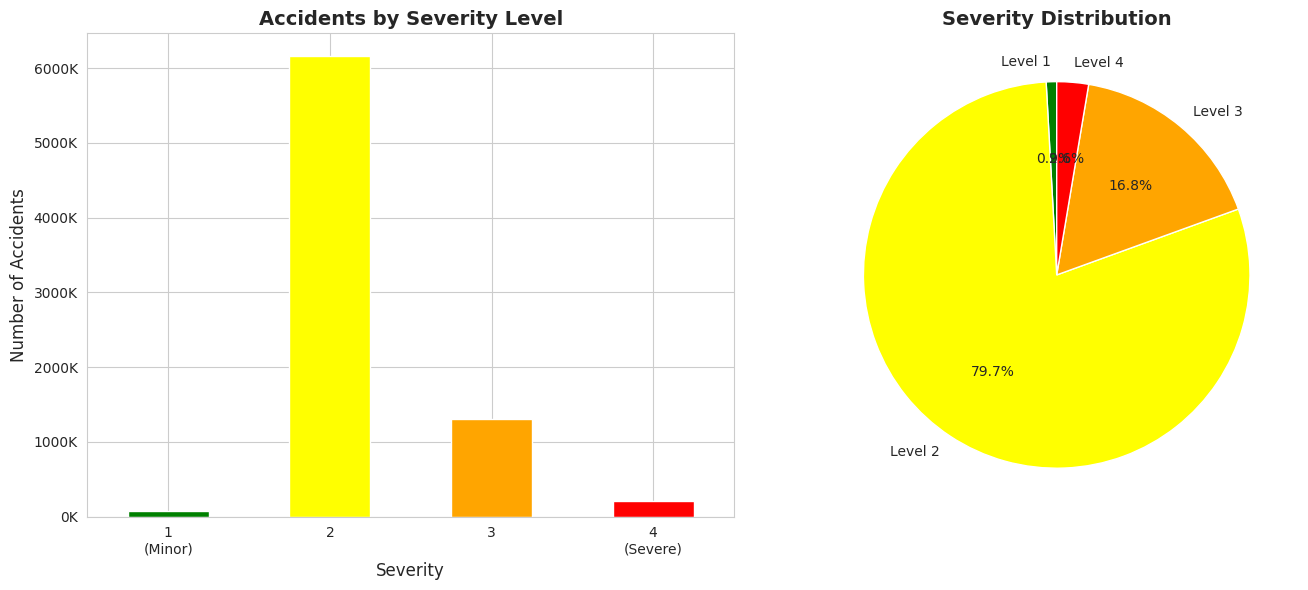

In [36]:
# Visualize severity distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
severity_counts.plot(kind='bar', ax=ax1, color=['green', 'yellow', 'orange', 'red'])
ax1.set_title('Accidents by Severity Level', fontsize=14, fontweight='bold')
ax1.set_xlabel('Severity', fontsize=12)
ax1.set_ylabel('Number of Accidents', fontsize=12)
ax1.set_xticklabels(['1\n(Minor)', '2', '3', '4\n(Severe)'], rotation=0)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

# Pie chart
ax2.pie(severity_counts, labels=['Level 1', 'Level 2', 'Level 3', 'Level 4'], 
        autopct='%1.1f%%', startangle=90, colors=['green', 'yellow', 'orange', 'red'])
ax2.set_title('Severity Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 10. Weather Conditions

In [37]:
# Top weather conditions
weather_counts = df['Weather_Condition'].value_counts().head(15)

print("Top 15 Weather Conditions:")
print("=" * 60)
for i, (weather, count) in enumerate(weather_counts.items(), 1):
    pct = (count / len(df)) * 100
    print(f"{i:2d}. {weather:35s} {count:>8,}  ({pct:5.2f}%)")

Top 15 Weather Conditions:
 1. Fair                                2,560,802  (33.13%)
 2. Mostly Cloudy                       1,016,195  (13.15%)
 3. Cloudy                               817,082  (10.57%)
 4. Clear                                808,743  (10.46%)
 5. Partly Cloudy                        698,972  ( 9.04%)
 6. Overcast                             382,866  ( 4.95%)
 7. Light Rain                           352,957  ( 4.57%)
 8. Scattered Clouds                     204,829  ( 2.65%)
 9. Light Snow                           128,680  ( 1.67%)
10. Fog                                   99,238  ( 1.28%)
11. Rain                                  84,331  ( 1.09%)
12. Haze                                  76,223  ( 0.99%)
13. Fair / Windy                          35,671  ( 0.46%)
14. Heavy Rain                            32,309  ( 0.42%)
15. Light Drizzle                         22,684  ( 0.29%)


In [38]:
# Convert data atributes from U.S. Customary System into Metric System (International System of Units)

# ºC to ºF
# Temperature conversions (°F to °C)
df['Temperature(C)'] = (df['Temperature(F)'] - 32) * 5/9
df['Wind_Chill(C)'] = (df['Wind_Chill(F)'] - 32) * 5/9

# Distance conversions
df['Wind_Speed(kph)'] = df['Wind_Speed(mph)'] * 1.609344  # More precise conversion factor
df['Visibility(km)'] = df['Visibility(mi)'] * 1.609344

# Precipitation conversion (inches to mm)
df['Precipitation(mm)'] = df['Precipitation(in)'] * 25.4

# Pressure conversion (inHg to hPa/mbar - more common meteorological unit)
df['Pressure(hPa)'] = df['Pressure(in)'] * 33.86389 

# Weather statistics
weather_stats = df[['Temperature(C)', 'Humidity(%)', 'Pressure(hPa)',
                     'Visibility(km)', 'Wind_Speed(kph)', 'Precipitation(mm)']].describe()

print("\nWeather Attribute Statistics:")
display(weather_stats.round(2))


Weather Attribute Statistics:


,Temperature(C),Humidity(%),Pressure(hPa),Visibility(km),Wind_Speed(kph),Precipitation(mm)
count,7564541.00,7554250.00,7587715.00,7551296.00,7157161.00,5524808.00
mean,16.48,64.83,1000.30,14.63,12.37,0.21
std,10.56,22.82,34.07,4.33,8.73,2.80
min,-67.22,1.00,0.00,0.00,0.00,0.00
25%,9.44,48.00,994.58,16.09,7.40,0.00
50%,17.78,67.00,1011.18,16.09,11.27,0.00
75%,24.44,84.00,1016.93,16.09,16.74,0.00
max,97.22,100.00,1985.44,225.31,1749.36,926.34


**Note:** The stats shows some extreme values for weather attributes which may need further investigation.

Lets plot violin plots to visualize the distribution of these weather attributes:

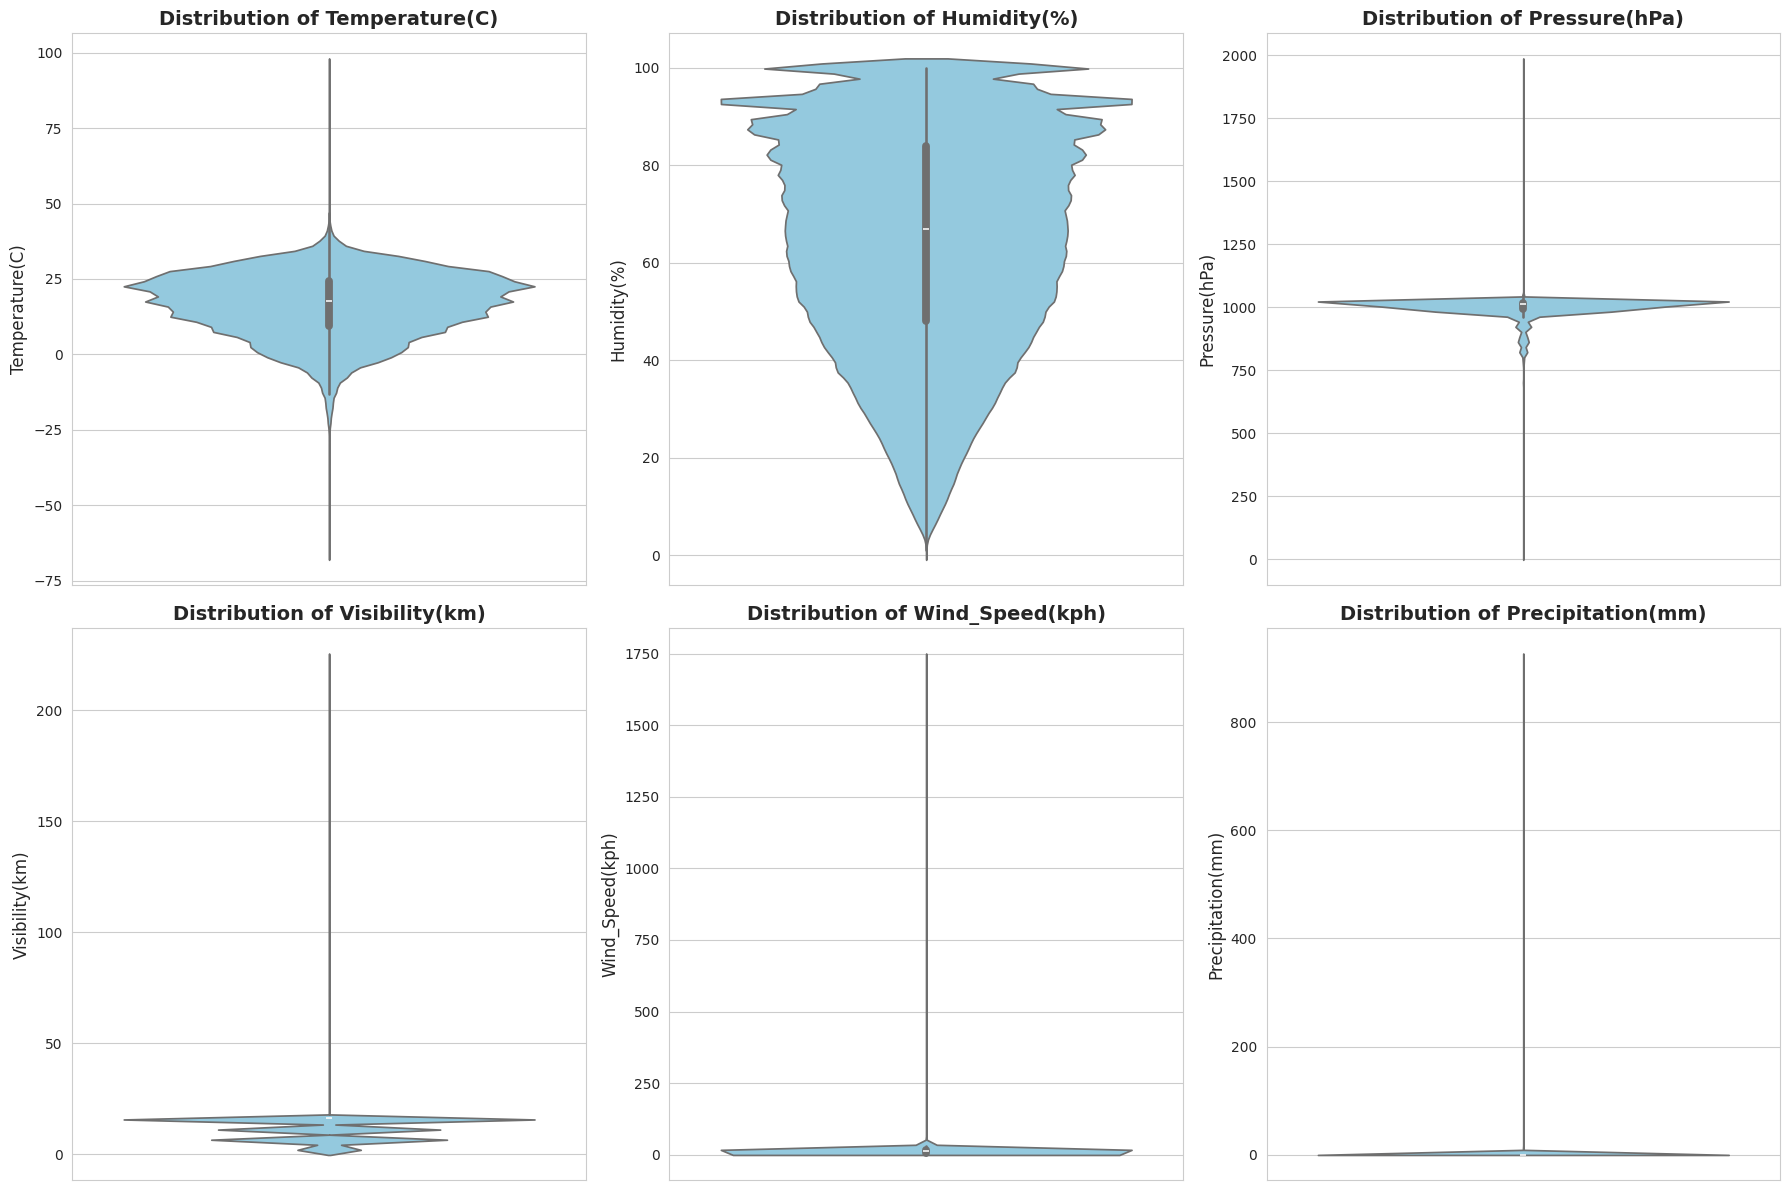

In [ ]:
# violin plots for weather attributes
weather_attributes = ['Temperature(C)', 'Humidity(%)', 'Pressure(hPa)',
                      'Visibility(km)', 'Wind_Speed(kph)', 'Precipitation(mm)']

def plot_weather_attributes(df, weather_attributes):
    _, axes = plt.subplots(2, 3, figsize=(18, 12))
    for ax, attr in zip(axes.flatten(), weather_attributes):
        sns.violinplot(y=df[attr], ax=ax, color='skyblue')
        ax.set_title(f'Distribution of {attr}', fontsize=14, fontweight='bold')
        ax.set_ylabel(attr, fontsize=12)
    plt.tight_layout()
    plt.show()

plot_weather_attributes(df, weather_attributes)

**Warning:** There is really something wrong the distribution of Pressure, Visibility, Wind Speed, and Precipitation. We will need to clean these values in the data cleaning phase. Although they are not normally distributed the values do make sense for very windy and rainy conditions we can try to assess if the weather condition matched the weather attribute's value.   

We will keep them for now to avoid losing data.

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Hour,DayOfWeek,Temperature(C),Wind_Chill(C),Wind_Speed(kph),Visibility(km),Precipitation(mm),Pressure(hPa)
count,3729082.00,3729082,3729082,3729082.00,3729082.00,2542309.00,2542309.00,3729082.00,3729082,3722184.00,3682193.00,3718654.00,3729082.00,3729082.00,3729082.00,3729082.00,3729082.00,3729082.00,3729082.00,3729082.00,3722184.00,3682193.00,3729082.00,3729082.00,3729082.00,3729082.00
mean,2.14,2021-05-26 16:45:09.912592128,2021-05-27 02:41:42.089205248,35.55,-92.58,35.41,-93.34,0.61,2021-05-26 16:45:21.066793728,64.56,63.66,61.00,29.65,10.00,7.06,0.00,2020.88,6.75,12.70,2.67,18.09,17.59,11.37,16.09,0.00,1004.01
min,1.00,2016-01-14 20:18:33,2016-02-08 06:37:08,24.55,-124.55,24.57,-124.55,0.00,2016-01-14 19:51:00,-50.00,-80.00,1.00,28.39,10.00,0.00,0.00,2016.00,1.00,0.00,0.00,-45.56,-62.22,0.00,16.09,0.00,961.40
25%,2.00,2020-08-21 16:58:06.249999872,2020-08-21 18:50:45.249999872,32.77,-112.11,32.69,-117.35,0.00,2020-08-21 16:53:00,53.00,53.00,46.00,29.34,10.00,3.00,0.00,2020.00,4.00,8.00,1.00,11.67,11.67,4.83,16.09,0.00,993.57
50%,2.00,2021-07-30 12:58:35,2021-07-30 20:18:58.500000,35.17,-84.49,35.14,-84.32,0.09,2021-07-30 12:53:00,67.00,67.00,62.00,29.78,10.00,7.00,0.00,2021.00,7.00,14.00,3.00,19.44,19.44,11.27,16.09,0.00,1008.47
75%,2.00,2022-05-02 11:51:30,2022-05-02 18:37:14,39.60,-80.19,39.34,-80.15,0.58,2022-05-02 11:53:00,78.00,78.00,77.00,29.98,10.00,10.00,0.00,2022.00,10.00,17.00,4.00,25.56,25.56,16.09,16.09,0.00,1015.24
max,4.00,2023-03-31 23:25:30,2023-03-31 23:59:00,49.00,-67.48,49.00,-67.48,336.57,2023-03-31 23:53:00,196.00,196.00,100.00,31.00,10.00,18.40,0.00,2023.00,12.00,23.00,6.00,91.11,91.11,29.61,16.09,0.00,1049.78
std,0.44,NaN,NaN,5.21,17.03,5.35,17.74,1.56,NaN,17.96,19.65,20.72,0.44,0.00,4.71,0.00,1.19,3.55,5.50,1.83,9.98,10.92,7.57,0.00,0.00,14.73


<class 'pandas.core.frame.DataFrame'>
Index: 3729082 entries, 27 to 7728392
Data columns (total 57 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int8          
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float32       
 6   Start_Lng              float32       
 7   End_Lat                float32       
 8   End_Lng                float32       
 9   Distance(mi)           float32       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                category      
 17  Timezone               object        
 18  Airport_Code           obj

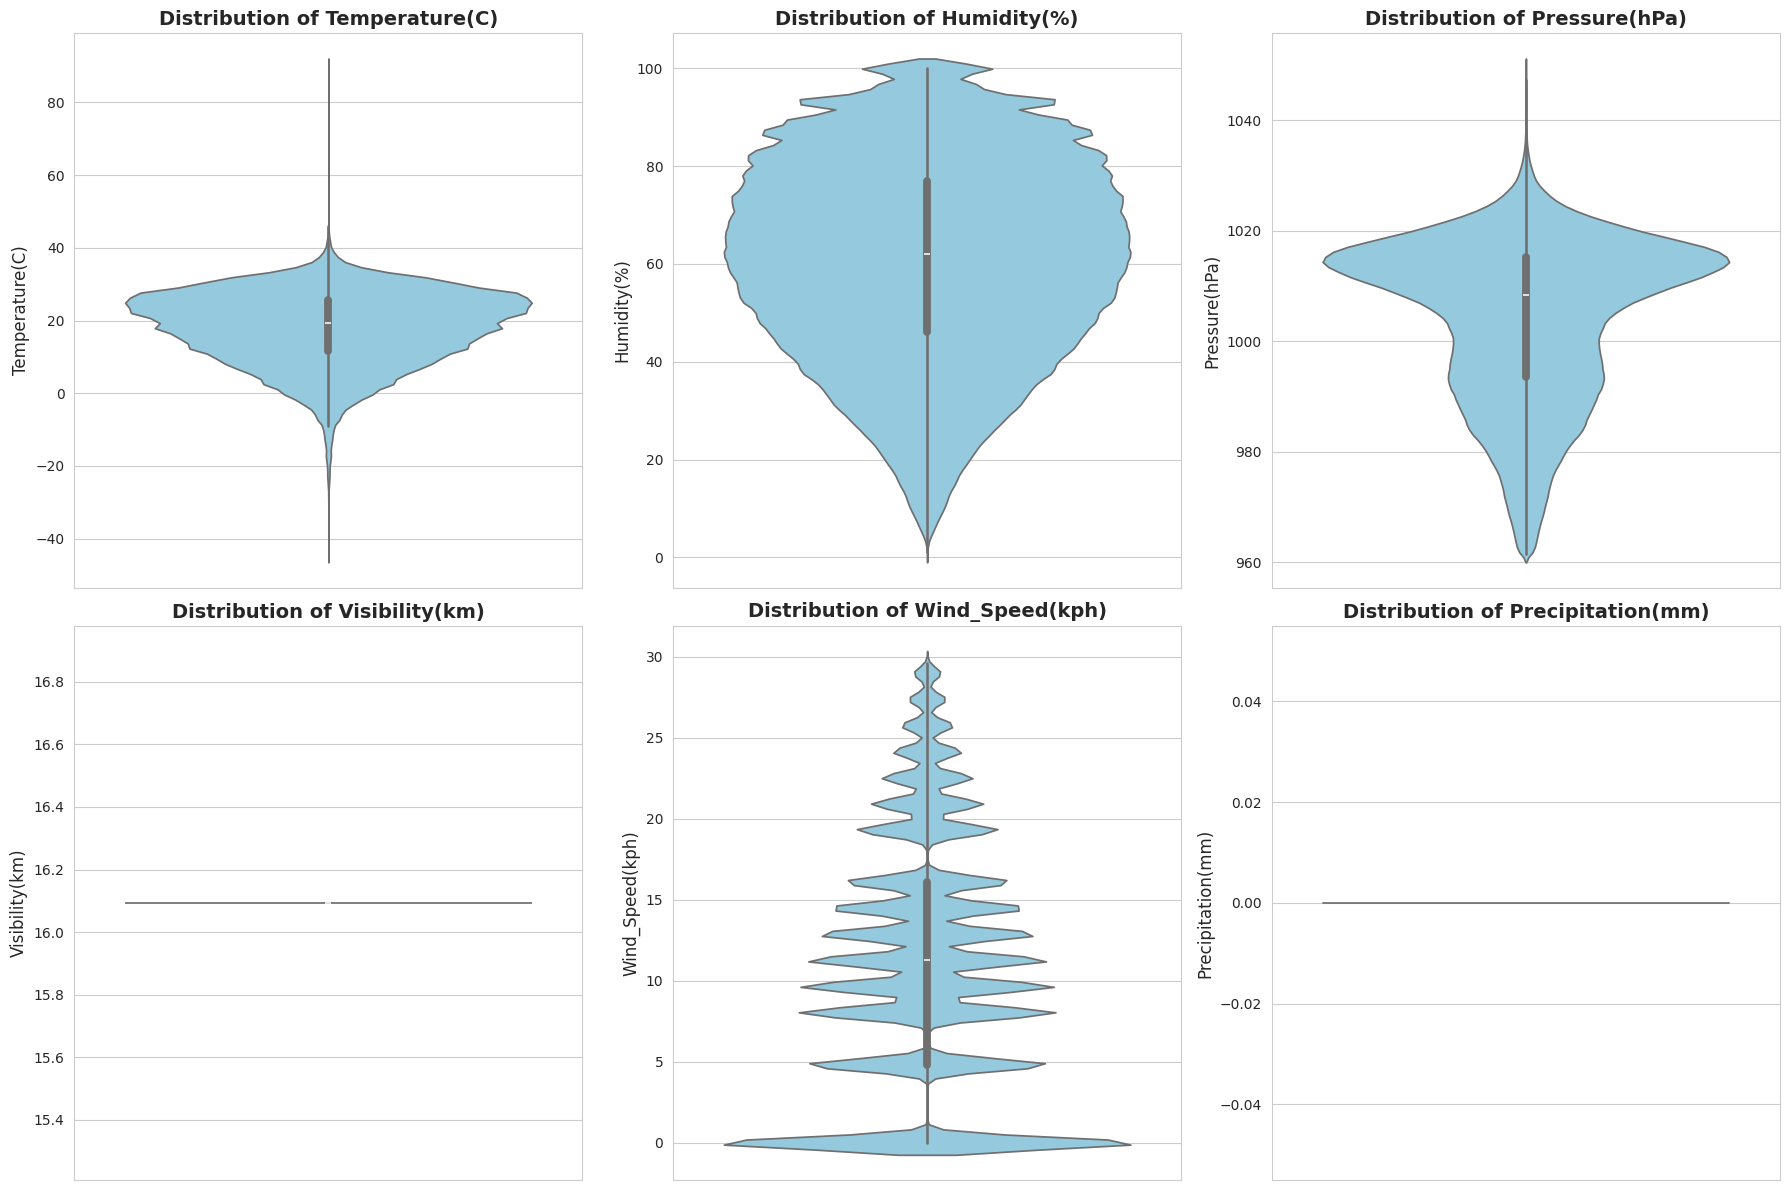

In [ ]:
# Test of removing outliers for Pressure, Visibility, Wind Speed, 
# and Precipitation using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove rows with outliers in the specified column
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data    

attributes_to_filter = ['Pressure(hPa)', 'Visibility(km)', 'Wind_Speed(kph)', 'Precipitation(mm)']
filtered_df = df.copy()
for col in attributes_to_filter:
    filtered_df = remove_outliers_iqr(filtered_df, col)

display(filtered_df.describe().round(2))
filtered_df.info()
plot_weather_attributes(filtered_df, weather_attributes)

## 11. Infrastructure Features

In [ ]:
# Infrastructure boolean columns
infrastructure_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                       'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# Handle missing values first by filling with False (assuming missing means feature not present)
df_clean = df[infrastructure_cols].fillna(False)

infra_data = []
for col in infrastructure_cols:
    true_count = df_clean[col].sum()
    false_count = len(df_clean) - true_count
    missing_count = df[col].isnull().sum()
    total_count = len(df)
    
    true_percentage = (true_count / total_count) * 100
    false_percentage = (false_count / total_count) * 100
    missing_percentage = (missing_count / total_count) * 100
    
    infra_data.append({
        'Feature': col,
        'True_Count': true_count,
        'True_Percentage': true_percentage,
        'False_Count': false_count,
        'False_Percentage': false_percentage,
        'Missing_Percentage': missing_percentage
    })

infra_stats = pd.DataFrame(infra_data).sort_values('True_Percentage', ascending=False)

print("Infrastructure Feature Presence:")
print("=" * 60)
print(infra_stats.to_string(index=False))

Infrastructure Feature Presence:
        Feature  True_Count  True_Percentage  False_Count  False_Percentage  Missing_Percentage
 Traffic_Signal     1143772            14.80      6584622             85.20                0.00
       Crossing      873763            11.31      6854631             88.69                0.00
       Junction      571342             7.39      7157052             92.61                0.00
           Stop      214371             2.77      7514023             97.23                0.00
        Station      201901             2.61      7526493             97.39                0.00
        Amenity       96334             1.25      7632060             98.75                0.00
        Railway       66979             0.87      7661415             99.13                0.00
       Give_Way       36582             0.47      7691812             99.53                0.00
        No_Exit       19545             0.25      7708849             99.75                0.00
Traffic

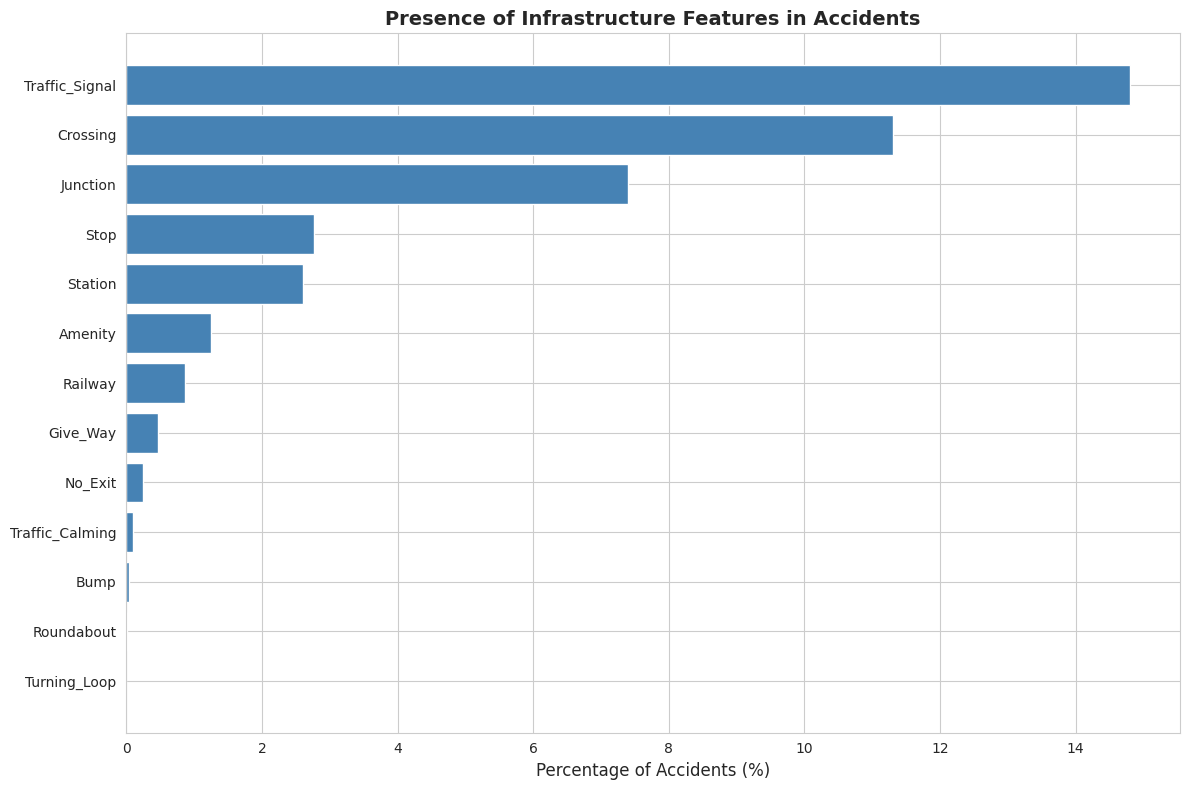

In [ ]:
# Visualize infrastructure features
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(infra_stats['Feature'], infra_stats['True_Percentage'], color='steelblue')
ax.set_xlabel('Percentage of Accidents (%)', fontsize=12)
ax.set_title('Presence of Infrastructure Features in Accidents', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## 12. Key Findings Summary

In [ ]:
print("="*80)
print("KEY FINDINGS - US ACCIDENTS DATASET (2016-2023)")
print("="*80)

print("\n📊 DATASET SIZE:")
print(f"   • Total records: {len(df):,}")
print("   • Features: 46")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**3:.2f} GB")

print("\n📍 GEOGRAPHIC COVERAGE:")
print(f"   • States: {df['State'].nunique()}")
print(f"   • Cities: {df['City'].nunique():,}")
print(f"   • Top state: {df['State'].value_counts().index[0]} ({df['State'].value_counts().iloc[0]:,} accidents)")

print("\n📅 TEMPORAL COVERAGE:")
print(f"   • Time span: {df['Start_Time'].min().date()} to {df['Start_Time'].max().date()}")
print(f"   • Peak year: {df['Year'].value_counts().index[0]} ({df['Year'].value_counts().iloc[0]:,} accidents)")
print(f"   • Peak hour: {df['Hour'].value_counts().index[0]}:00 ({df['Hour'].value_counts().iloc[0]:,} accidents)")
print(f"   • Busiest day: {df['DayName'].value_counts().index[0]} ({df['DayName'].value_counts().iloc[0]:,} accidents)")

print("\n⚠️ SEVERITY DISTRIBUTION:")
for sev in sorted(df['Severity'].unique()):
    count = (df['Severity'] == sev).sum()
    pct = (count / len(df)) * 100
    print(f"   • Level {sev}: {count:>10,} ({pct:>5.2f}%)")

print("\n🌤️ WEATHER CONDITIONS:")
print(f"   • Most common: {df['Weather_Condition'].value_counts().index[0]}")
print(f"   • Avg temperature: {df['Temperature(F)'].mean():.1f}°F")
print(f"   • Avg visibility: {df['Visibility(mi)'].mean():.1f} miles")

print("\n🚦 INFRASTRUCTURE:")
print(f"   • Traffic signals: {(df['Traffic_Signal'].sum() / len(df) * 100):.1f}%")
print(f"   • Crossings: {(df['Crossing'].sum() / len(df) * 100):.1f}%")
print(f"   • Junctions: {(df['Junction'].sum() / len(df) * 100):.1f}%")

print("\n⚠️ DATA QUALITY:")
print(f"   • Columns with missing data: {len(missing)} / {len(df.columns)}")
print(f"   • Overall completeness: {(1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%")

print("\n" + "="*80)

KEY FINDINGS - US ACCIDENTS DATASET (2016-2023)

📊 DATASET SIZE:
   • Total records: 7,728,394
   • Features: 46
   • Memory usage: 6.62 GB

📍 GEOGRAPHIC COVERAGE:
   • States: 49
   • Cities: 13,678
   • Top state: CA (1,741,433 accidents)

📅 TEMPORAL COVERAGE:
   • Time span: 2016-01-14 to 2023-03-31
   • Peak year: 2022 (1,762,452 accidents)
   • Peak hour: 7:00 (587,472 accidents)
   • Busiest day: Friday (1,366,499 accidents)

⚠️ SEVERITY DISTRIBUTION:
   • Level 1:     67,366 ( 0.87%)
   • Level 2:  6,156,981 (79.67%)
   • Level 3:  1,299,337 (16.81%)
   • Level 4:    204,710 ( 2.65%)

🌤️ WEATHER CONDITIONS:
   • Most common: Fair
   • Avg temperature: 61.7°F
   • Avg visibility: 9.1 miles

🚦 INFRASTRUCTURE:
   • Traffic signals: 14.8%
   • Crossings: 11.3%
   • Junctions: 7.4%

⚠️ DATA QUALITY:
   • Columns with missing data: 22 / 57
   • Overall completeness: 95.89%



## 13. Save preprocessed Dataset with Modified Data Types and New Features

Lets save dataset with modified data types and new features for quick testing in subsequent notebooks. Additionally, we will save a smaller sample (1%) for quick experiments.

In [40]:
print(df.columns.tolist())
# display(df.head(5))

['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year', 'Month', 'Hour', 'DayOfWeek', 'DayName', 'Temperature(C)', 'Wind_Chill(C)', 'Wind_Speed(kph)', 'Visibility(km)', 'Precipitation(mm)', 'Pressure(hPa)']


In [41]:
#Lets save dataset with modified data types and new features for quick testing in subsequent notebooks. Additionally, we will save a smaller sample (1%) for quick experiments.

output_full_path = Config.ACCIDENTS_CLEANED_DIR / "US_Accidents_preProcessed.csv"
# removed wether atributes win US customary system to reduce size
cols_to_save = [col for col in df.columns if col not in [
    'Temperature(F)', 'Wind_Chill(F)', 'Visibility(mi)',
    'Wind_Speed(mph)', 'Precipitation(in)', 'Pressure(in)', 'Visibility(mi)']]
df[cols_to_save].to_csv(output_full_path, index=False)

print("\nDataset saved with the following details:")
print(f"- Columns saved: {len(cols_to_save)} out of {len(df.columns)}")
print(f"✓ Cleaned dataset saved to: {output_full_path}")
# Save a 1% sample for quick experiments
sample_frac = 0.01
output_sample_path = Config.ACCIDENTS_CLEANED_DIR / "US_Accidents_preProcessed_sample.csv"
df_sampled = df[cols_to_save].sample(frac=sample_frac, random_state=42)
df_sampled.to_csv(output_sample_path, index=False)
print(f"✓ Sampled dataset ({sample_frac * 100}%) saved to: {output_sample_path}")



Dataset saved with the following details:
- Columns saved: 51 out of 57
✓ Cleaned dataset saved to: /home/pfanyka/Desktop/MASTERS/FCDados/DScience_project/data/processed/accidents_cleaned/US_Accidents_preProcessed.csv
✓ Sampled dataset (1.0%) saved to: /home/pfanyka/Desktop/MASTERS/FCDados/DScience_project/data/processed/accidents_cleaned/US_Accidents_preProcessed_sample.csv


## Next Steps

1. **Notebook 02**: Load and explore OpenStreetMap (OSM) road network data
2. **Notebook 03**: Perform spatial join between accidents and road segments
3. **Notebook 04**: Clean and preprocess integrated dataset
4. **Notebook 05**: Exploratory Data Analysis (EDA)
5. **Notebook 06**: Feature engineering

---

**Dataset loaded and initial exploration complete! ✓**